<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: программист-исследователь Mail.ru Group  Юрий Кашницкий

Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/forms/m1ZWbhB30ZVDPKm92).**

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$.

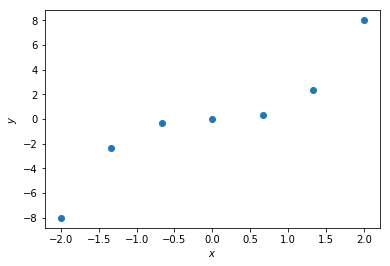

In [22]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. 
# Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

[-2  2] [ -2.53765263e-16  -2.53765263e-16]


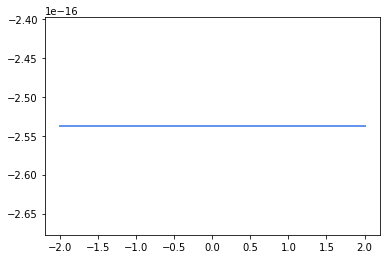

In [23]:
# ВЕРНО!
# mean = sum(y)/7 
# То же самое значение среднего по массиву можно получить так:
mean = np.mean(y)

X = np.array([-2,2])
y = np.empty(2)
y.fill(mean)
print(X, y)
plt.plot(X.reshape(-1,1), y, color="cornflowerblue", label="max_depth=2", linewidth=2)

In [24]:
# НЕВЕРНО!
# from sklearn.tree import DecisionTreeRegressor
# regr1 = DecisionTreeRegressor(max_depth=1)

# X_train = X.reshape(-1,1)
# # y_train = y.reshape(-1,1)

# print(X.shape, X_train.shape)
# # print(y.shape, y_train.shape)

# regr1.fit(X_train,y)

# X_test = np.arange(-2,2).reshape(-1,1)
# y_test = regr1.predict(X_test)

# # plt.figure()
# plt.scatter(X_train, y, s=15, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=2", linewidth=2)

In [25]:
# НЕВЕРНО!
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# print(X_train.shape, y_train.shape)

# regr1 = DecisionTreeRegressor(max_depth=1)
# regr1.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

# # plt.figure()
# plt.scatter(X_train, y_train, s=15, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=2", linewidth=2)

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

[-2.         -1.33333333 -0.66666667]
[ 0.          0.66666667  1.33333333  2.        ]
[-8.         -2.37037037 -0.2962963 ] [ 0.          0.2962963   2.37037037  8.        ]
-3.55555555556 2.66666666667


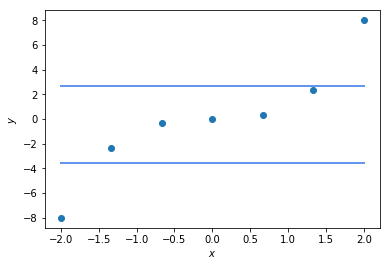

In [26]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# Ваш код здесь
# np.array_split(X, np.where(X<0.))

# print(X)

X_test1 = X[:3]
print(X_test1)
X_test2 = X[3:]
print(X_test2)

y1 = X_test1 ** 3
y2 = X_test2 ** 3

print(y1,y2)

mean1 = np.mean(y1)
mean2 = np.mean(y2)
print(mean1, mean2)

X_test1 = np.array([-2,2])
y_test1 = np.empty(2)
y_test1.fill(mean1)

X_test2 = np.array([-2,2])
y_test2 = np.empty(2)
y_test2.fill(mean2)

plt.plot(X_test1.reshape(-1,1), y_test1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test2.reshape(-1,1), y_test2, color="cornflowerblue", label="max_depth=2", linewidth=2)

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, МАКСИМИЗИРУЮЩИЕ значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

19.916127768
0.0
10.7910379515
10.6666666667
19.916127768
0.0
10.7910379515
19.916127768
0.0
10.7910379515
19.916127768
0.0
10.7910379515
19.916127768
0.0
10.7910379515
19.916127768
0.0
10.7910379515
19.916127768
0.0
10.7910379515
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
7.9231824417
9.65706447188
19.916127768
10.5935070873
10.3155006859
19.916127768
10.5935070873
10.3155006859
19.916127768
10.5935070873
10.3155006859
19.916127768
10.5935070873
10.3155006859
19.916127768
10.5935070873
10.3155006859
19.916127768
10.5935070873
10.3155006859
19.916127768
10.3155006859
10.5935070873
19.916127768
10.3155006859
10.5935070873
19.916127768
10.3155006859
10.5935070873
19.916127768
10.3155006859
10.5935070873
19.916127768
10.3155006859
10.5935070873
19.916127768
10.3155006859
10.59350708

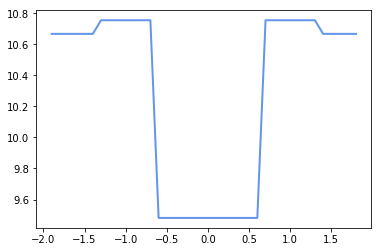

In [27]:
def regression_var_criterion(X, y, t):
    indexes = np.argwhere(X<t)
    indexes_len = len(indexes)
    
#     print(indexes, indexes_len, indexes[indexes_len-1][0])
    
    [Xl, Xr] = np.array_split(X, [indexes[indexes_len-1][0]+1])
    [yl, yr] = np.array_split(y, [indexes[indexes_len-1][0]+1])
    
#     print(Xl, Xr, yl, yr)
    
    L = len(X)
    Ll = len(Xl)
    Lr = len(Xr)
    
    y_sum = 0
    for i in np.arange(0, L):
#         print(y[i])
        y_sum += (y[i] - 1/L * np.sum(y)) ** 2
    
    Dx = 1/L * y_sum
    print(Dx)
    
    y_suml = 0
    for i in np.arange(0, Ll):
        y_suml += (yl[i] - 1/Ll * np.sum(yl)) ** 2
    
    Dxl = 1/Ll * y_suml
    print(Dxl)
    
    y_sumr = 0
    for i in np.arange(0, Lr):
        y_sumr += (yr[i] - 1/Lr * np.sum(yr)) ** 2
    
    Dxr = 1/Lr * y_sumr
    print(Dxr)
    
    Q = Dx - Ll/L * Dxl - Lr/L * Dxr
    
    return Q
    
# def y_sum(y):
#     s = 0
#     for i in np.arange(0, len(y)):
#         print(y[i])
#         s = s + y[i]
#     return s
    
# print(y_sum(y))
# print(np.sum(y))
# print(y)
# print(np.sum(X))
# print(X)

# A = np.linspace(2.0, 3.0, num=5)
# np.sum(A)
# B = np.linspace(-2,2,5)
# np.sum(B)

print(regression_var_criterion(X, y, -1.9))
# print(regression_var_criterion(X, y, 0))
# print(regression_var_criterion(X, y, 1.9))

Xq = []
for i in np.arange(-1.9,1.9,0.1):
    Xq.append(regression_var_criterion(X,y,i))
    
Xq, np.arange(-1.9,1.9,0.1)

# s = np.argwhere(X<1.9)
# s_len = len(s)
# print(s, s_len, s[s_len-1][0])
# np.array_split(X, [s[s_len-1][0] + 1])

plt.plot(np.arange(-1.9,1.9,0.1), Xq, color="cornflowerblue", label="max_depth=2", linewidth=2)

In [28]:
# Ваш код здесь
# Ответ 1: нет???

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

-8.0 -1.33333333333 0.888888888889 8.0


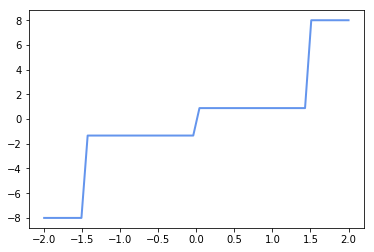

In [53]:
# Ваш код здесь
# from sklearn.tree import DecisionTreeRegressor
# regr1 = DecisionTreeRegressor(max_depth=2)

# X_train = X.reshape(-1,1)
# # y_train = y.reshape(-1,1)

# # print(X.shape, X_train.shape)
# # print(y.shape, y_train.shape)

# regr1.fit(X_train,y)

# X_test = np.arange(-2,2.1,0.1).reshape(-1,1)
# y_test = regr1.predict(X_test)

# # plt.figure()
# plt.scatter(X_train, y, s=15, edgecolor="black", c="darkorange", label="data")
# plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=2", linewidth=2)

# Ответ 2: 4

Xa = X[:1]
Xb = X[1:3]
Xc = X[3:6]
Xd = X[6:7]

ya = Xa ** 3
yb = Xb ** 3
yc = Xc ** 3
yd = Xd ** 3

meana = np.mean(ya)
meanb = np.mean(yb)
meanc = np.mean(yc)
meand = np.mean(yd)
print(meana, meanb, meanc, meand)

ya, yb, yc, yd

def y_test(X):
    if X<0:
        if X<-1.5:
            return meana
        else:
            return meanb
    else:
        if X<1.5:
            return meanc
        else:
            return meand

X_test1 = np.linspace(-2,2)

y_test1 = []
for i in X_test1:
    y_test1.append(y_test(i))

plt.plot(X_test1.reshape(-1,1), y_test1, color="cornflowerblue", label="max_depth=2", linewidth=2)

**<font color='red'>Вопрос 2.</font> Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке [-2, 2]? Считаем только горизонтальные отрезки.**
- 2
- 3
- 4
- 5

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [9]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах", а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`.

In [11]:
# Ваш код здесь
df['test'] = 1
df['age_years'] = round(df['age']/365)

df['is_chol_1'] = pd.get_dummies(df[df['cholesterol']==1]['test'])
df['is_chol_2'] = pd.get_dummies(df[df['cholesterol']==2]['test'])
df['is_chol_3'] = pd.get_dummies(df[df['cholesterol']==3]['test'])

df['is_chol_1'].fillna(0, inplace=True)
df['is_chol_2'].fillna(0, inplace=True)
df['is_chol_3'].fillna(0, inplace=True)

df['is_gluc_1'] = pd.get_dummies(df[df['gluc']==1]['test'])
df['is_gluc_2'] = pd.get_dummies(df[df['gluc']==2]['test'])
df['is_gluc_3'] = pd.get_dummies(df[df['gluc']==3]['test'])

df['is_gluc_1'].fillna(0, inplace=True)
df['is_gluc_2'].fillna(0, inplace=True)
df['is_gluc_3'].fillna(0, inplace=True)


df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,test,age_years,is_chol_1,is_chol_2,is_chol_3,is_gluc_1,is_gluc_2,is_gluc_3
id,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,50.0,1.0,0.0,0.0,1.0,0.0,0.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,55.0,0.0,0.0,1.0,1.0,0.0,0.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1,52.0,0.0,0.0,1.0,1.0,0.0,0.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [12]:
y = df['cardio']
X = df.drop('cardio', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

# X.head()
# y.head()

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [13]:
# Ваш код здесь
clf = DecisionTreeClassifier(max_depth=3, random_state=17)
clf.fit(X_train, y_train)

export_graphviz(clf, feature_names=X.columns, out_file='test.dot', filled=True)
!dot -Tpng 'test.dot' -o 'test.png'

# Ответ 3: age, ap_hi, chol=3

Error: dot: can't open 'test.dot'


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть разбиения по этим трем признакам можно найти в дереве)**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [14]:
# Ваш код здесь
y_predicted = clf.predict(X_valid)
y_predicted[:10]

score = accuracy_score(y_valid, y_predicted)
print(score)

0.721285714286


Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [15]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), tree_params, scoring='accuracy', cv=5)
tree_grid.fit(X_train, y_train)

tree_grid.best_params_

{'max_depth': 6}

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

[mean: 0.71551, std: 0.00363, params: {'max_depth': 2}, mean: 0.72771, std: 0.00485, params: {'max_depth': 3}, mean: 0.73049, std: 0.00453, params: {'max_depth': 4}, mean: 0.73092, std: 0.00518, params: {'max_depth': 5}, mean: 0.73196, std: 0.00504, params: {'max_depth': 6}, mean: 0.73053, std: 0.00340, params: {'max_depth': 7}, mean: 0.72965, std: 0.00393, params: {'max_depth': 8}, mean: 0.72780, std: 0.00445, params: {'max_depth': 9}, mean: 0.72573, std: 0.00525, params: {'max_depth': 10}]


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


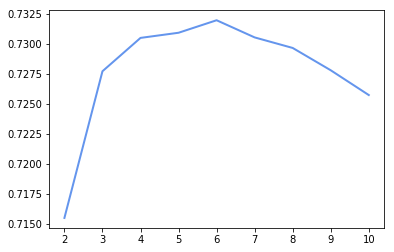

In [16]:
# Ваш код здесь

# Неверно, т.к., я не использую cv, а GridSearchCV использует (разбивает данные на 5 кусков и в цикле, сдвигая их, использует)
# score_arr = []
# for i in range(2,11):
#     clf_test = DecisionTreeClassifier(max_depth=i, random_state=17)
#     clf_test.fit(X_train, y_train)
#     y_predicted = clf_test.predict(X_valid)
#     score = accuracy_score(y_valid, y_predicted)
#     score_arr.append(score)

# print(score_arr)

# plt.plot(range(2,11), score_arr, color="cornflowerblue", label="max_depth=2", linewidth=2)

# Верно
x_arr = []
y_arr = []
a = tree_grid.grid_scores_
for tup in a:
# #     x_arr.append(tup[0])
    y_arr.append(tup[1])
    
# print(x_arr, y_arr)
print(a)
plt.plot(range(2,11), y_arr, color="cornflowerblue", label="max_depth=2", linewidth=2)

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`. 

In [17]:
# Ваш код здесь
tree_grid.best_params_, tree_grid.best_score_

# Ответ 4: нет, да

({'max_depth': 6}, 0.73195918367346935)

**<font color='red'>Вопрос 4.</font> Верно ли, что кривая валидации по максимальной глубине дерева при переборе `max_depth` от 2 до 10 монотонно возрастает или убывает? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 0.01 на отложенной выборке?**
- да, да
- да, нет
- нет, да
- нет, нет

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,test,age_years,is_chol_1,is_chol_2,is_chol_3,is_gluc_1,is_gluc_2,is_gluc_3
id,,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,50.0,1.0,0.0,0.0,1.0,0.0,0.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,55.0,0.0,0.0,1.0,1.0,0.0,0.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1,52.0,0.0,0.0,1.0,1.0,0.0,0.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,48.0,1.0,0.0,0.0,1.0,0.0,0.0


Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках.

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [60]:
# Ваш код здесь
df['age45_50'] = pd.get_dummies(df[(df['age_years']<50) & (df['age_years']>=45)]['test'])
df['age50_55'] = pd.get_dummies(df[(df['age_years']<55) & (df['age_years']>=50)]['test'])
df['age55_60'] = pd.get_dummies(df[(df['age_years']<60) & (df['age_years']>=55)]['test'])
df['age60_65'] = pd.get_dummies(df[(df['age_years']<65) & (df['age_years']>=60)]['test'])

df['age45_50'].fillna(0, inplace=True)
df['age50_55'].fillna(0, inplace=True)
df['age55_60'].fillna(0, inplace=True)
df['age60_65'].fillna(0, inplace=True)

df['ap_hi120_140'] = pd.get_dummies(df[(df['ap_hi']<140) & (df['ap_hi']>=120)]['test'])
df['ap_hi140_160'] = pd.get_dummies(df[(df['ap_hi']<160) & (df['ap_hi']>=140)]['test'])
df['ap_hi160_180'] = pd.get_dummies(df[(df['ap_hi']<180) & (df['ap_hi']>=160)]['test'])

df['ap_hi120_140'].fillna(0, inplace=True)
df['ap_hi140_160'].fillna(0, inplace=True)
df['ap_hi160_180'].fillna(0, inplace=True)

df['male'] = pd.get_dummies(df[df['gender']==2]['test'])

df['male'].fillna(0, inplace=True)

df.head().T

id,0,1,2,3,4
age,18393.0,20228.0,18857.0,17623.0,17474.0
gender,2.0,1.0,1.0,2.0,1.0
height,168.0,156.0,165.0,169.0,156.0
weight,62.0,85.0,64.0,82.0,56.0
ap_hi,110.0,140.0,130.0,150.0,100.0
ap_lo,80.0,90.0,70.0,100.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0
alco,0.0,0.0,0.0,0.0,0.0


In [71]:
y = df['cardio']
X = df.drop(['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','alco','active','cardio','test','age_years', 'is_gluc_1','is_gluc_2','is_gluc_3'], axis=1)

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

X.head().T
# y.head()

clf = DecisionTreeClassifier(max_depth=3, random_state=17)
clf.fit(X, y)

export_graphviz(clf, feature_names=X.columns, out_file='test1.dot', filled=True)
!dot -Tpng 'test1.dot' -o 'test1.png'

Error: dot: can't open 'test1.dot'
